In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use("seaborn")

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, matthews_corrcoef, f1_score, cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [132]:
seed = 7

In [133]:
df = pd.read_csv(r"PubChemfingerprints.csv")
df

,Name,pKi,Activity,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,AUTOGEN_105 smiles_1,7.920819,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AUTOGEN_105 smiles_2,7.920819,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AUTOGEN_105 smiles_3,7.853872,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AUTOGEN_105 smiles_4,7.698970,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AUTOGEN_105 smiles_5,7.677781,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,AUTOGEN_105 smiles_101,7.772113,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,AUTOGEN_105 smiles_102,7.863279,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,AUTOGEN_105 smiles_103,7.602060,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,AUTOGEN_105 smiles_104,8.214670,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
df.shape

(105, 884)

In [135]:
df.describe()

,pKi,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
count,105.000000,105.0,105.0,105.000000,105.0,105.0,105.0,105.0,105.0,105.0,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
mean,7.281185,1.0,1.0,0.990476,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.762017,0.0,0.0,0.097590,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.737549,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,6.080922,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,7.696804,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,8.431798,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,11.638272,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
df.head()

,Name,pKi,Activity,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,AUTOGEN_105 smiles_1,7.920819,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AUTOGEN_105 smiles_2,7.920819,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AUTOGEN_105 smiles_3,7.853872,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AUTOGEN_105 smiles_4,7.698970,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AUTOGEN_105 smiles_5,7.677781,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
classes=df['Activity'].unique()
classes

array(['Active', 'Inactive'], dtype=object)

In [138]:
df["Activity"].value_counts()

Activity
Active      69
Inactive    36
Name: count, dtype: int64

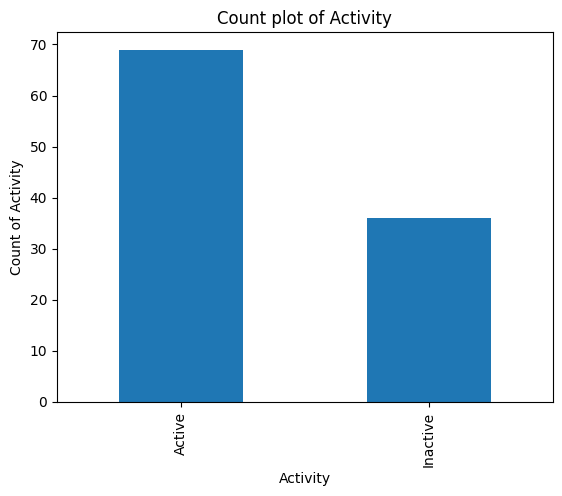

In [139]:
df['Activity'].value_counts().plot.bar()
plt.xlabel("Activity")
plt.ylabel("Count of Activity")
plt.title("Count plot of Activity")
plt.show()

In [140]:
print(df.columns)

Index(['Name', 'pKi', 'Activity', 'PubchemFP0', 'PubchemFP1', 'PubchemFP2',
       'PubchemFP3', 'PubchemFP4', 'PubchemFP5', 'PubchemFP6',
       ...
       'PubchemFP871', 'PubchemFP872', 'PubchemFP873', 'PubchemFP874',
       'PubchemFP875', 'PubchemFP876', 'PubchemFP877', 'PubchemFP878',
       'PubchemFP879', 'PubchemFP880'],
      dtype='object', length=884)


In [141]:
df.isnull().sum().sum()

0

In [142]:
df1 = df.drop(['pKi', 'Activity', 'Name'], axis=1)
df1

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
101,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
102,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
103,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [143]:
# Drop all rows with missin data
## df = df.dropna()

In [144]:
# Drop some columns which is not relevant to the analysis (they are not numeric)
## cols_to_drop = ['Name', 'Ticket', 'Cabin']
## df = df.drop(cols_to_drop, axis=1)

In [145]:
# Assuming X contains features (fingerprints) and y contains labels (WT Inhibition (%))
X = df.drop(['pKi', 'Activity', 'Name'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
101,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
102,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
103,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [146]:
Y_1= df['pKi']
Y_1

0      7.920819
1      7.920819
2      7.853872
3      7.698970
4      7.677781
         ...   
100    7.772113
101    7.863279
102    7.602060
103    8.214670
104    7.978811
Name: pKi, Length: 105, dtype: float64

In [147]:
# 2. Convert the target variable to binary labels based on the threshold
threshold = 7  # Threshold of 50%
Y = (Y_1 >= threshold).astype(int)
Y

0      1
1      1
2      1
3      1
4      1
      ..
100    1
101    1
102    1
103    1
104    1
Name: pKi, Length: 105, dtype: int32

In [148]:
Y.value_counts()

pKi
1    69
0    36
Name: count, dtype: int64

In [149]:
df.shape

(105, 884)

In [150]:
# 3. Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state= seed)

In [151]:
X_train

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
15,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
52,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
70,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
67,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
25,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
68,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [152]:
X_train.shape

(84, 881)

In [153]:
Y_train

15    0
11    0
52    0
70    1
45    1
     ..
83    1
67    1
25    0
68    1
47    1
Name: pKi, Length: 84, dtype: int32

In [154]:
Y_train.shape

(84,)

In [155]:
X_test

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
49,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
77,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
94,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [156]:
X_test.shape

(21, 881)

In [157]:
Y_test

49     1
81     1
77     1
91     0
26     0
59     1
20     0
94     1
13     0
50     1
96     1
5      1
97     1
102    1
74     1
104    1
76     0
46     1
22     0
12     0
71     1
Name: pKi, dtype: int32

In [158]:
Y_test.shape

(21,)

In [159]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(84, 881) (21, 881) (84,) (21,)


**MODEL TRAINING**

In [160]:
#Training model for pubchem fingerprint
model= GradientBoostingClassifier(random_state=seed)
model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=7)

**TRAINING**

In [161]:
model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=7)

In [162]:
Y_train_pred = model.predict(X_train)

In [163]:
Y_train_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [164]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})
predictions1

,Y_train,Y_train_pred
15,0,0
11,0,1
52,0,0
70,1,1
45,1,1
...,...,...
83,1,1
67,1,1
25,0,0
68,1,1


In [165]:
train_data = X_train.copy()
train_data['PRED_Activity'] = model.predict(X_train)
train_data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,PRED_Activity
15,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
52,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
70,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
45,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
67,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
25,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
68,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [166]:
# 6. Determine which molecules are active and which are not based on the predictions and the set threshold
active_molecules = X_train[Y_train_pred == 1]  # Molecules predicted as active
inactive_molecules = X_train[Y_train_pred == 0]  # Molecules predicted as inactive

In [167]:
active_molecules

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
11,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
70,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
43,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
65,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
30,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
93,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
101,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [168]:
inactive_molecules

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
15,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
52,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
37,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
36,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
35,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**TESTING**

In [169]:
Y_test_pred = model.predict(X_test)

In [170]:
Y_test_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [171]:
predictions1 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})
predictions1

,Y_test,Y_test_pred
49,1,0
81,1,1
77,1,1
91,0,1
26,0,0
59,1,1
20,0,0
94,1,1
13,0,0
50,1,0


In [172]:
test_data = X_test.copy()
test_data['PRED_Activity'] = model.predict(X_test)
test_data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,PRED_Activity
49,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
77,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
91,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
26,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
20,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
94,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
13,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [173]:
# 6. Determine which molecules are active and which are not based on the predictions and the set threshold
active_molecules = X_test[Y_test_pred == 1]  # Molecules predicted as active
inactive_molecules = X_test[Y_test_pred == 0]  # Molecules predicted as inactive

In [174]:
active_molecules

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
77,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
94,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
96,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
97,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
102,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
74,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [175]:
inactive_molecules

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
49,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
22,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**PERFORMACNE METRICS FOR TRAIN DATA**

In [176]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        29
           1       0.92      1.00      0.96        55

    accuracy                           0.94        84
   macro avg       0.96      0.91      0.93        84
weighted avg       0.95      0.94      0.94        84



In [177]:
def evaluate_classifier(Y_train, Y_train_pred):
  print(f"Accuracy: {accuracy_score(Y_train, Y_train_pred):.4f}")
  print(f"Precision: {precision_score(Y_train, Y_train_pred):.4f}")
  print(f"Recall: {recall_score(Y_train, Y_train_pred):.4f}")
  print(f"ROC AUC: {roc_auc_score(Y_train, Y_train_pred):.4f}")
  print(f"balanced_accuracy: {balanced_accuracy_score(Y_train, Y_train_pred):.4f}")
  print(f"mcc: {matthews_corrcoef(Y_train, Y_train_pred):.4f}")
  print(f"f1: {f1_score(Y_train, Y_train_pred):.4f}")
  print(f"cohen_kappa: {cohen_kappa_score(Y_train, Y_train_pred):.4f}")
  print(f"conf_matrix: {confusion_matrix(Y_train, Y_train_pred)}")

In [178]:
evaluate_classifier(Y_train, Y_train_pred)

Accuracy: 0.9405
Precision: 0.9167
Recall: 1.0000
ROC AUC: 0.9138
balanced_accuracy: 0.9138
mcc: 0.8710
f1: 0.9565
cohen_kappa: 0.8627
conf_matrix: [[24  5]
 [ 0 55]]


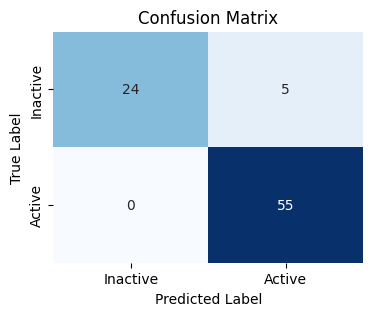

In [179]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_train, Y_train_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [180]:
def plot_roc(Y_train,Y_train_pred):
    fpr,tpr,threshold=roc_curve(Y_train,Y_train_pred)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.4f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.4f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

In [181]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

ROC AUC=0.9138


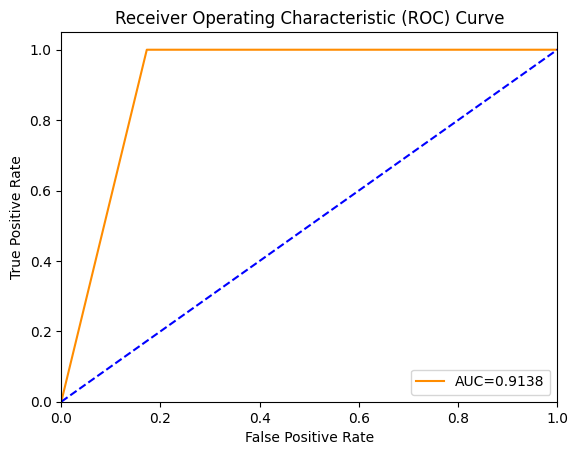

In [182]:
plot_roc(Y_train,Y_train_pred)

In [183]:
## Sensitivity = TP/(TP+FN)
## SPECIFICITY = TN/(TN+FP)
## Positive Predictive Value (PPV) = TP/(TP+FP)
## Negative Predictive Value (NPV) = TN/(TN+FN)
## FPR = FP/(TN+FP)
## NPV = TN/(TN+FN)

In [184]:
cm = confusion_matrix(Y_train, Y_train_pred)

In [185]:
cm

array([[24,  5],
       [ 0, 55]], dtype=int64)

In [186]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [187]:
# Print Confusion Matrix
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 24
TN: 55
FP: 5
FN: 0


In [188]:
## Sensitivity = TP/(TP+FN)
Sensitivity = TP/(TP+FN)

In [189]:
Sensitivity

1.0

In [190]:
## SPECIFICITY = TN/(TN+FP)
SPECIFICITY = TN/(TN+FP)

In [191]:
SPECIFICITY

0.9166666666666666

In [192]:
## Positive Predictive Value (PPV) = TP/(TP+FP)
PPV = TP/(TP+FP)


In [193]:
PPV

0.8275862068965517

In [194]:
## Negative Predictive Value (NPV) = TN/(TN+FN)
NPV = TN/(TN+FN)


In [195]:
NPV

1.0

In [196]:
## False Positive Rate (FPR) = FP/(TN+FP)
FPR = FP/(TN+FP)

In [197]:
FPR

0.08333333333333333

In [198]:
accuracy = (TP+TN)/(TP+TN+FP+FN)

In [199]:
accuracy

0.9404761904761905

In [200]:
def calculate_tpr_fpr(Y_train, Y_train_pred):
  cm = confusion_matrix(Y_train, Y_train_pred)
  TP = cm[0, 0]
  TN = cm[1, 1]
  FP = cm[0, 1]
  FN = cm[1, 0]


  tpr =  TP/(TP + FN)
  fpr = 1 - TN/(TN+FP)

  return tpr, fpr

In [201]:
fpr, tpr, thresholds = roc_curve(Y_train, Y_train_pred)
auc(fpr, tpr)

0.9137931034482758

**PERFORMANCE METRICS FOR TEST DATA**

In [202]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.86      0.86      0.86        14

    accuracy                           0.81        21
   macro avg       0.79      0.79      0.79        21
weighted avg       0.81      0.81      0.81        21



In [203]:
def evaluate_classifier(Y_test, Y_test_pred):
  print(f"Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
  print(f"Precision: {precision_score(Y_test, Y_test_pred):.4f}")
  print(f"Recall: {recall_score(Y_test, Y_test_pred):.4f}")
  print(f"ROC AUC: {roc_auc_score(Y_test, Y_test_pred):.4f}")
  print(f"balanced_accuracy: {balanced_accuracy_score(Y_test, Y_test_pred):.4f}")
  print(f"mcc: {matthews_corrcoef(Y_test, Y_test_pred):.4f}")
  print(f"f1: {f1_score(Y_test, Y_test_pred):.4f}")
  print(f"cohen_kappa: {cohen_kappa_score(Y_test, Y_test_pred):.4f}")
  print(f"conf_matrix: {confusion_matrix(Y_test, Y_test_pred)}")

In [204]:
evaluate_classifier(Y_test, Y_test_pred)

Accuracy: 0.8095
Precision: 0.8571
Recall: 0.8571
ROC AUC: 0.7857
balanced_accuracy: 0.7857
mcc: 0.5714
f1: 0.8571
cohen_kappa: 0.5714
conf_matrix: [[ 5  2]
 [ 2 12]]


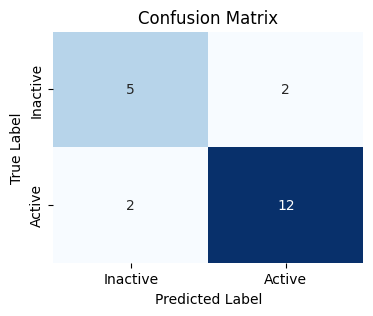

In [205]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_test_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [206]:
def plot_roc(Y_test, Y_test_pred):
    fpr,tpr,threshold=roc_curve(Y_test, Y_test_pred)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.4f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.4f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

ROC AUC=0.7857


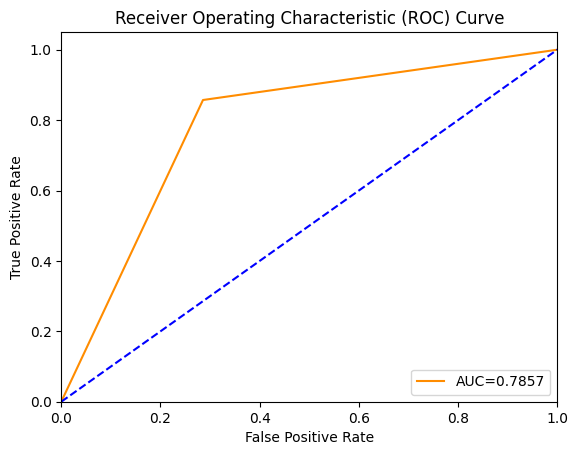

In [207]:
plot_roc(Y_test, Y_test_pred)

In [208]:
## Sensitivity = TP/(TP+FN)
## SPECIFICITY = TN/(TN+FP)
## Positive Predictive Value (PPV) = TP/(TP+FP)
## Negative Predictive Value (NPV) = TN/(TN+FN)
## FPR = FP/(TN+FP)
## NPV = TN/(TN+FN)

In [209]:
cm1 = confusion_matrix(Y_test, Y_test_pred)

In [210]:
cm1

array([[ 5,  2],
       [ 2, 12]], dtype=int64)

In [211]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [212]:
# Print Confusion Matrix
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 24
TN: 55
FP: 5
FN: 0


In [213]:
## Sensitivity = TP/(TP+FN)
Sensitivity = TP/(TP+FN)

In [214]:
Sensitivity

1.0

In [215]:
## SPECIFICITY = TN/(TN+FP)
SPECIFICITY = TN/(TN+FP)

In [216]:
SPECIFICITY

0.9166666666666666

In [217]:
## Positive Predictive Value (PPV) = TP/(TP+FP)
PPV = TP/(TP+FP)

In [218]:
PPV

0.8275862068965517

In [219]:
## Negative Predictive Value (NPV) = TN/(TN+FN)
NPV = TN/(TN+FN)

In [220]:
NPV

1.0

In [221]:
## False Positive Rate (FPR) = FP/(TN+FP)
FPR = FP/(TN+FP)

In [222]:
FPR

0.08333333333333333

In [223]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred)
auc(fpr, tpr)

0.7857142857142858

In [224]:
my_param_grid = {'max_leaf_nodes':[7, 8, 9], 'max_depth':[6, 7, 8], 'min_samples_leaf': [3, 4, 5]}

In [225]:
from sklearn.model_selection import GridSearchCV

In [226]:
GridSearchCV(estimator=GradientBoostingClassifier(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=7),
             param_grid={'max_depth': [6, 7, 8], 'max_leaf_nodes': [7, 8, 9],
                         'min_samples_leaf': [3, 4, 5]},
             verbose=3)

In [227]:
grid = GridSearchCV(estimator=GradientBoostingClassifier(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [228]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3;, score=0.706 total time=   0.1s
[CV 2/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3;, score=0.765 total time=   0.2s
[CV 3/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3;, score=0.588 total time=   0.1s
[CV 4/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3;, score=0.647 total time=   0.2s
[CV 5/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3;, score=0.750 total time=   0.2s
[CV 1/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4;, score=0.647 total time=   0.1s
[CV 2/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4;, score=0.765 total time=   0.1s
[CV 3/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4;, score=0.706 total time=   0.2s
[CV 4/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4;, score=0.647 total time=   0.2s
[CV 5/5] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=4;, score=0.7

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=7),
             param_grid={'max_depth': [6, 7, 8], 'max_leaf_nodes': [7, 8, 9],
                         'min_samples_leaf': [3, 4, 5]},
             verbose=3)

In [229]:
grid.best_params_

{'max_depth': 6, 'max_leaf_nodes': 8, 'min_samples_leaf': 4}

In [230]:
Y_test_optimised = grid.predict(X_test)

In [231]:
Y_test_optimised

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [232]:
predictions1['Y_test_optimised'] = Y_test_optimised
predictions1.head()

,Y_test,Y_test_pred,Y_test_optimised
49,1,0,1
81,1,1,1
77,1,1,1
91,0,1,1
26,0,0,0


**PERFORMANCE METRICS FOR TEST DATA**

In [233]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_optimised))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.87      0.93      0.90        14

    accuracy                           0.86        21
   macro avg       0.85      0.82      0.83        21
weighted avg       0.86      0.86      0.85        21



In [234]:
def evaluate_classifier(Y_test, Y_test_optimised):
  print(f"Accuracy: {accuracy_score(Y_test, Y_test_optimised):.4f}")
  print(f"Precision: {precision_score(Y_test, Y_test_optimised):.4f}")
  print(f"Recall: {recall_score(Y_test, Y_test_optimised):.4f}")
  print(f"ROC AUC: {roc_auc_score(Y_test, Y_test_optimised):.4f}")
  print(f"balanced_accuracy: {balanced_accuracy_score(Y_test, Y_test_optimised):.4f}")
  print(f"mcc: {matthews_corrcoef(Y_test, Y_test_optimised):.4f}")
  print(f"f1: {f1_score(Y_test, Y_test_optimised):.4f}")
  print(f"cohen_kappa: {cohen_kappa_score(Y_test, Y_test_optimised):.4f}")
  print(f"conf_matrix: {confusion_matrix(Y_test, Y_test_optimised)}")

In [235]:
evaluate_classifier(Y_test, Y_test_optimised)

Accuracy: 0.8571
Precision: 0.8667
Recall: 0.9286
ROC AUC: 0.8214
balanced_accuracy: 0.8214
mcc: 0.6708
f1: 0.8966
cohen_kappa: 0.6667
conf_matrix: [[ 5  2]
 [ 1 13]]


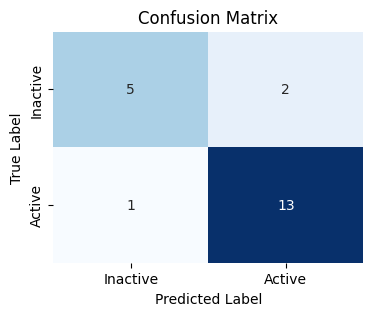

In [236]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_test_optimised)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('Confusion_Matrix_gbc.png', dpi=300, bbox_inches='tight')  

plt.show()

In [237]:
def plot_roc(Y_test, Y_test_optimised):
    fpr,tpr,threshold=roc_curve(Y_test, Y_test_optimised)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.4f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.4f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.savefig('roccurve_gbc.png', dpi=300, bbox_inches='tight')  

    plt.show()

ROC AUC=0.8214


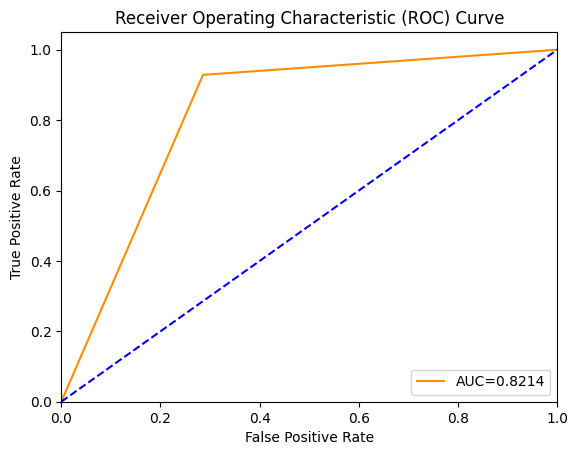

In [238]:
plot_roc(Y_test, Y_test_optimised)

In [239]:
## Sensitivity = TP/(TP+FN)
## SPECIFICITY = TN/(TN+FP)
## Positive Predictive Value (PPV) = TP/(TP+FP)
## Negative Predictive Value (NPV) = TN/(TN+FN)
## FPR = FP/(TN+FP)
## NPV = TN/(TN+FN)

In [240]:
cm1 = confusion_matrix(Y_test, Y_test_optimised)

In [241]:
cm1

array([[ 5,  2],
       [ 1, 13]], dtype=int64)

In [242]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [243]:
# Print Confusion Matrix
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 24
TN: 55
FP: 5
FN: 0


In [244]:
## Sensitivity = TP/(TP+FN)
Sensitivity = TP/(TP+FN)

In [245]:
Sensitivity

1.0

In [246]:
## SPECIFICITY = TN/(TN+FP)
SPECIFICITY = TN/(TN+FP)

In [247]:
SPECIFICITY

0.9166666666666666

In [248]:
## Positive Predictive Value (PPV) = TP/(TP+FP)
PPV = TP/(TP+FP)

In [249]:
PPV

0.8275862068965517

In [250]:
## Negative Predictive Value (NPV) = TN/(TN+FN)
NPV = TN/(TN+FN)

In [251]:
NPV

1.0

In [252]:
## False Positive Rate (FPR) = FP/(TN+FP)
FPR = FP/(TN+FP)

In [253]:
FPR

0.08333333333333333

In [254]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_optimised)
auc(fpr, tpr)

0.8214285714285715

In [255]:
import pickle

In [256]:
with open('gbc.pkl','wb') as file:
    pickle.dump(model, file)